In [1]:
import os 
import importlib
import numpy as np
from pathlib import Path
import nibabel as nib  # pip install nibabel
from matplotlib import pyplot as plt
data = importlib.import_module('unet.2D.data')

Using TensorFlow backend.


In [2]:
##IMAGES##
nii_path = Path('Brats/data/Task01_BrainTumour/imagesTr/BRATS_100.nii.gz').absolute()
img = np.array(nib.load(nii_path).dataobj)
print("Raw Image shape     = ", img.shape)
if len(img.shape) != 4:  # Make sure 4D
    img = np.expand_dims(img, -1)

Raw Image shape     =  (240, 240, 155, 4)


In [3]:
#Crop + Center
x, y, z, c = img.shape

# Make sure starting index is >= 0
startx = max(x // 2 - (240 // 2), 0)
starty = max(y // 2 - (240 // 2), 0)
startz = max(z // 2 - (240 // 2), 0)

# Make sure ending index is <= size
endx = min(startx + 240, x)
endy = min(starty + 240, y)
endz = min(startz + 240, z)
img = img[startx:endx, starty:endy, startz:endz, :]
print("Crop Center Image shape     = ", img.shape)
#Normalize Image
for channel in range(img.shape[3]):
    img[:, :, :, channel] = (
        img[:, :, :, channel] - np.mean(img[:, :, :, channel])) \
        / np.std(img[:, :, :, channel])
print("Crop Center and Normalized Image shape     = ", img.shape)
img = np.swapaxes(np.array(img), 0, -2)
print("Crop Center, Normalized and Axes Swapped Image shape     = ", img.shape)

Crop Center Image shape     =  (240, 240, 155, 4)
Crop Center and Normalized Image shape     =  (240, 240, 155, 4)
Crop Center, Normalized and Axes Swapped Image shape     =  (155, 240, 240, 4)


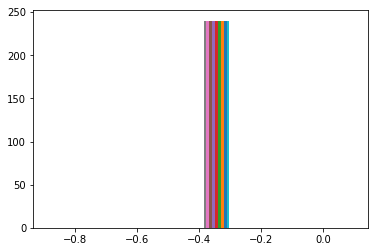

In [5]:
plt.hist(img[10,:,:,3])
plt.show()

Text(0.5,1,'T2-weighted MRI')

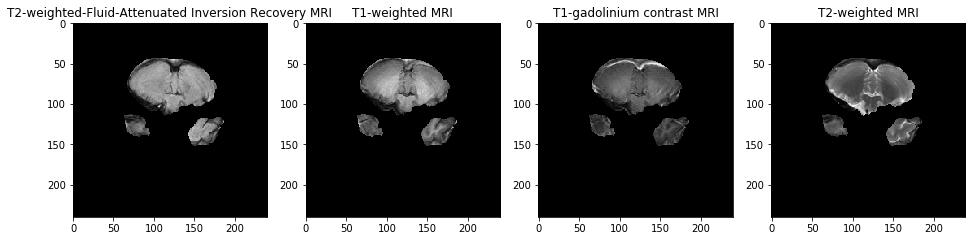

In [6]:
index = 50
fig, axs = plt.subplots(1,4,figsize=(16,4))
axs[0].imshow(img[index,:,:,0],cmap='gray')
axs[0].set_title('T2-weighted-Fluid-Attenuated Inversion Recovery MRI')
axs[1].imshow(img[index,:,:,1],cmap='gray')
axs[1].set_title('T1-weighted MRI')
axs[2].imshow(img[index,:,:,2],cmap='gray')
axs[2].set_title('T1-gadolinium contrast MRI')
axs[3].imshow(img[index,:,:,3],cmap='gray')
axs[3].set_title('T2-weighted MRI')

In [7]:
##MASKS##
nii_path = Path('Brats/data/Task01_BrainTumour/labelsTr/BRATS_020.nii.gz').absolute()
msk = np.array(nib.load(nii_path).dataobj)
print("Raw Masks shape     = ", msk.shape)
if len(msk.shape) != 4:  # Make sure 4D
    msk = np.expand_dims(msk, -1)

Raw Masks shape     =  (240, 240, 155)


In [8]:
#Crop + Center
x, y, z, c = msk.shape

# Make sure starting index is >= 0
startx = max(x // 2 - (240 // 2), 0)
starty = max(y // 2 - (240 // 2), 0)
startz = max(z // 2 - (240 // 2), 0)

# Make sure ending index is <= size
endx = min(startx + 240, x)
endy = min(starty + 240, y)
endz = min(startz + 240, z)
#Crop + Center
msk = msk[startx:endx, starty:endy, startz:endz, :]
print("Crop Center Image shape     = ", msk.shape)

Crop Center Image shape     =  (240, 240, 155, 1)


In [9]:
msk[msk > 1] = 1  # Combine all masks

In [10]:
msk = np.swapaxes(np.array(msk), 0, -2)
print("Crop Centered and Axes Swapped Image shape     = ", msk.shape)

Crop Centered and Axes Swapped Image shape     =  (155, 240, 240, 1)
